# Inferência Bayseana

- Nome: Henrique Tibério Brandão Vieira Augusto
- Matrícula: 2186330010
- Turma: 2021-1

**INSTRUÇÕES**:

- **Mantenha a estrutura de enunciados e células de resposta apresentada neste modelo.**
- **Todas as conclusões devem estar fundamentadas com experimentos e análises de dados que corroborem os aspectos afirmados.**

In [1]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

%matplotlib notebook

___
## Exercício 1

No colab "2 - Inferência", no exemplo "Update Bayesiano com distribuição Beta", foi apresentado um procedimento simplificado de inferência Bayesiana para a distribuição beta. Neste update, os parâmetros $\alpha, \beta$ estão relacionados ao grau de crença sobre a hipótese. Diferentes parametrizações geram diferentes diferentes distribuições que se assemelham às gaussianas, às uniformes e, inclusive, distribuições assimétricas.

No exemplo em questão, o cenário simula a jogada de uma moeda, e, com a coleta de dados a respeito das jogadas, deseja-se tirar conclusões a respeito da moeda. Neste caso, tem-se um _a priori_ modelado por uma distribuição beta e o modelo relativo aos dados (as jogadas da moeda) é implicitamente representado por uma distribuição de Bernoulli. E, por esta razão, sabe-se que o _a posteriori_ também é conhecido, sendo também uma distribuição beta. O conceito utilizado neste caso, é o de **a priori conjugado**: certas configurações de _a priori_ e verossimilhança determinam a forma do _a posteriori_.

**Qual o impacto do _a priori_ e dos parâmetros na inferência?** Faça um estudo de caso a respeito da simluação de diferentes moedas onde o sucesso do experimento de Bernoulli representa a saída de cara na moeda. Analise diferentes valores para o _ground-truth_ $p$ da moeda, diferentes valores para o número de jogadas, e diferentes valores para $\alpha, \beta$. Explore _a prioris_ simétricos, assimétricos, com maiores ou menores magnitudes. Disserte a respeito do impacto desses parâmetros para os resultados obtidos no _a posteriori_.

Temos nos parâmetros alfa e beta, bem como na sua magnitude, um par que simula de forma discreta a nossa convição sobre o resultado do evento.

Abaixo observamos distribuições beta com valores $\alpha,\beta$ em situações distintas:

<IPython.core.display.Javascript object>


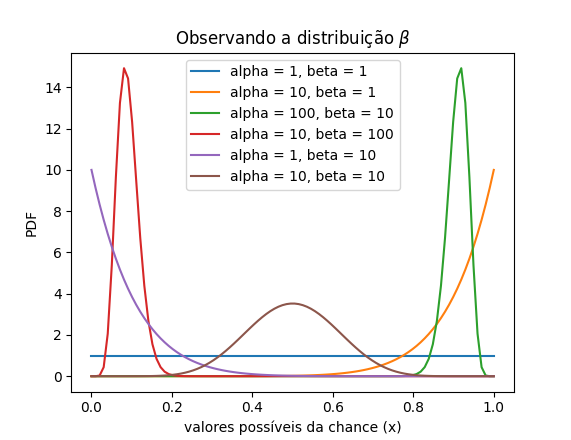

In [6]:
_alfas = [1, 10, 100, 10, 1, 10]
_betas = [1, 1, 10, 100, 10, 10]

x = np.linspace(0, 1, 100)

for _a, _b in zip(_alfas, _betas):
    plt.plot(x, stats.beta(_a, _b).pdf(x))
    plt.xlabel('valores possíveis da chance (x)')
    plt.ylabel('PDF')

plt.title(r'Observando a distribuição $\beta$')
plt.legend([f'alpha = {_a}, beta = {_b}' for _a,_b in zip(_alfas, _betas)])

plt.show()

Podemos perceber que quanto maior a diferença de magnitude entre $\alpha$ e $\beta$, mais concentrada em uma região a nossa _PDF_ se encontra.

Seguindo para a simulação de jogadas de uma moeda:

In [3]:
def simular_jogadas(alfa, beta, p, jogadas):
    a = alfa
    b = beta
    df = pd.DataFrame({"a": [a], "b": [b]})
    for _ in range(jogadas):
        if np.random.rand() < p: # sucesso?
            # cara -> sucesso
            a, b = df.iloc[-1].values
            a += 1
            df = df.append({"a": a, "b": b}, ignore_index=True)
        else:
            # coroa -> insucesso
            a, b = df.iloc[-1].values
            b += 1
            df = df.append({"a": a, "b": b}, ignore_index=True)
    return df

In [10]:
alfas = [10, 50, 200]
betas = [5, 200, 50]
ground_truths = [0.25, 0.5, 0.75]
num_jogadas = [100, 500, 1000]

<IPython.core.display.Javascript object>


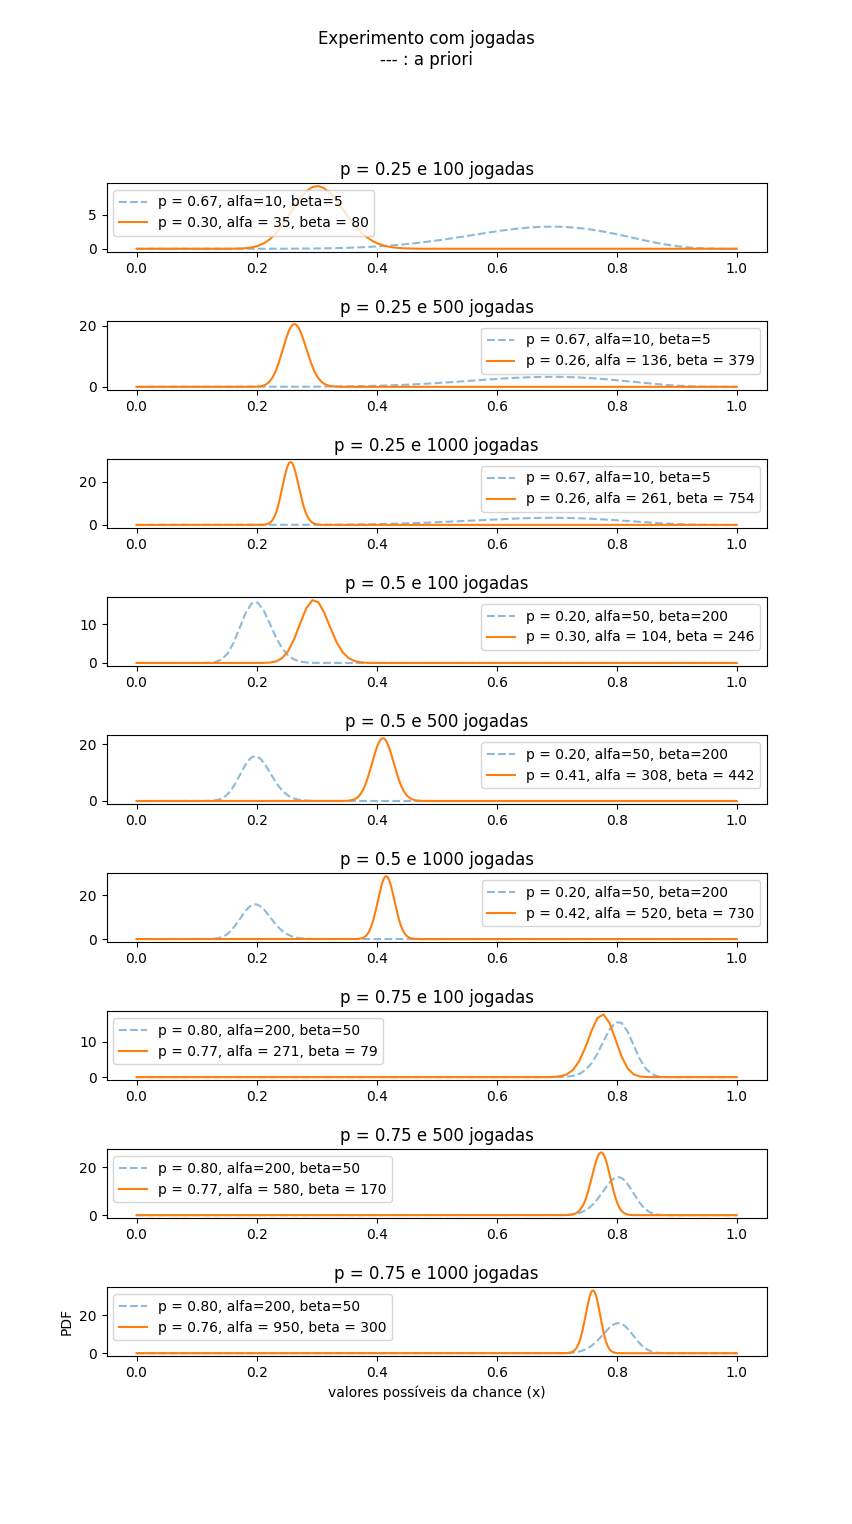

In [7]:
nrows, ncols, nindex = 9, 1, 1

for _a, _b, _p in zip(alfas, betas, ground_truths):
    for _n in num_jogadas:
        plt.subplot(nrows, ncols, nindex)

        x = np.linspace(0, 1, _n)
        a, b = simular_jogadas(alfa=_a, beta=_b, p=_p, jogadas=_n).iloc[-1].values
        sns.lineplot(x=x, y=stats.beta(_a, _b).pdf(x), alpha=0.5, linestyle='--')
        sns.lineplot(x=x, y=stats.beta(a, b).pdf(x))

        plt.title(f'p = {_p} e {_n} jogadas')
        plt.legend([f'p = {_a/(_a+_b):.2f}, alfa={_a}, beta={_b}',
                    f'p = {a/(a+b):.2f}, alfa = {a}, beta = {b}'])
        nindex += 1

plt.suptitle('Experimento com jogadas\n--- : a priori')
plt.xlabel('x')
plt.ylabel('PDF')
plt.subplots_adjust(hspace=1.0)
plt.show()

- [x] Variar o _ground truth_, de forma crescente, significa aumentar a nossa possibilidade de um resultado favorável ("cara"), nos dá um viés.

    Quanto à $\alpha,\beta$, podemos notar que mesmo na situação em que um $\alpha,\beta = 5, 10$, embora um tenha o dobro do valor do outro, suas magnitudes (i.e., confiança) ainda são pequenas, nos dando curvas relativamente abertas, i.e., "espalhando" as probabilidades do nosso _a priori_ (crença inicial); uma vez que suas magnitudes aumentam, a curva tende a ficar mais concentrada em uma região.

    Sobre a quantiade de jogadas, observamos que este valor tende a acentuar a representação do resultado, quanto mais simulações são feitas, mais o resultado novo tende a reforçar o significado do resultado anterior.



___
## Exercício 2

No colab "2 - Inferência", no tópico "Exemplo da altura dos programdores Python" foi apresentada uma modelagem para inferência que usava de referência a altura média da população do planeta como _a priori_ para a inferência da média do _a posteriori_. Pra a inferência da variância da distribuição, foi utilizado um _a priori_ não informado.

Implemente um cenário semelhante, onde a amostra de alturas coletadas seja dada por uma Gaussiana de média 180 e variância 9. O tamanho da amostra deve ser a altura de 100 programadores. Faça uma inferência em grid da média e variância do _a posteriori_ considerando tanto _a priori_'s desinformados para média e variância, quanto _a priori_'s a partir das informações prévias de média e variância da altura das pessoas do planeta. **Analise as diferenças entre os _a posteriori_ obitos**.

___
## Exercício 3

Implemente um modelo de VAE Gaussiano para uma base de escolha do grupo, que seja diferente da apresentada na sala de aula. Treine este modelo em um latente de tamanho arbitrário (de dimensionalidade 3 ou maior). Exiba as propriedades do modelo treinado para geração de amostras com a combinação das principais características atreladas aos agrupamentos do espaço latente. 

Para tal, utilize o procedimento de encontrar os vetores de média dos dois tipos de dados sobre os quais deseja-se gerar a amostra combinada e gere o vetor apropriado para o decoder que represente combinações das características em questão.

Exiba alguns exemplos gerados a partir das combinações escolhidas.

___
## Exercício 4

Implemente uma arquitetura de rede neural profunda Bayesiana com a biblioteca Pyro em algum dataset de escolha do grupo. Avalie a robustez da rede neural bayesiana usando a estratégia de amostragem de redes neurais apresentada em sala de aula.

Disserte a respeito do desempenho do modelo treinado em um dataset de validação atrelado ao dataset de treinamento. Avalie também o comportamento da rede neural para padrões de dados diferentes dos dados utilizados para treinamento. Desde dados levemente diferentes a dados completamente diferentes.

Neste contexto, disserte a respeito das ocasiões onde a rede neural chegou a uma classificação quando não deveria classificar o dado e vice-versa, quando a rede neural não classificou dados que deveria ser capaz de classificar. Através da estratégia de composição de distribuições para as previsões da rede neural, também considere nas avaliações diferentes limiares de incerteza para considerar que houve uma predição ou não da rede neural Bayesiana para o dado em questão.